In [31]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("./data/drawndata1.csv")
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


In [5]:
X = df[['x', 'y']].values
y = df['z'] == "a"

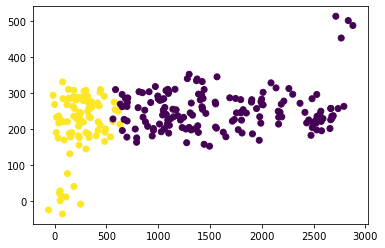

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig("./images/X_y.png")

Hay una gran diferencia de escalas entre el eje x e Y, por eso usamos la desviación estandar.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_new = StandardScaler().fit_transform(X)

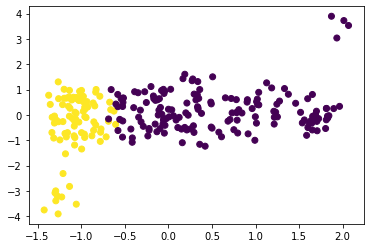

In [12]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)
plt.savefig("./images/X_new_y.png")

In [14]:
x = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000))

(array([ 89., 226., 151., 139., 103.,  72.,  72.,  44.,  33.,  21.,  13.,
          6.,   6.,   6.,   3.,   5.,   4.,   1.,   3.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.99824624,  0.87816799,  3.75458223,  6.63099646,  9.50741069,
        12.38382493, 15.26023916, 18.13665339, 21.01306763, 23.88948186,
        26.76589609, 29.64231033, 32.51872456, 35.39513879, 38.27155303,
        41.14796726, 44.02438149, 46.90079573, 49.77720996, 52.65362419,
        55.53003843, 58.40645266, 61.28286689, 64.15928113, 67.03569536,
        69.91210959, 72.78852383, 75.66493806, 78.54135229, 81.41776653,
        84.29418076]),
 <BarContainer object of 30 artists>)

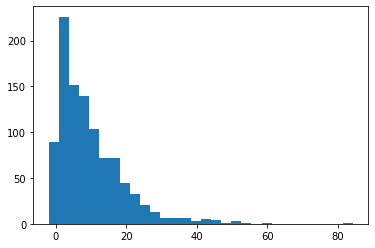

In [15]:
plt.hist(x,30)

(array([ 89., 226., 151., 139., 103.,  72.,  72.,  44.,  33.,  21.,  13.,
          6.,   6.,   6.,   3.,   5.,   4.,   1.,   3.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-11.72162722,  -8.84521298,  -5.96879875,  -3.09238452,
         -0.21597028,   2.66044395,   5.53685818,   8.41327242,
         11.28968665,  14.16610088,  17.04251512,  19.91892935,
         22.79534358,  25.67175782,  28.54817205,  31.42458628,
         34.30100052,  37.17741475,  40.05382898,  42.93024322,
         45.80665745,  48.68307169,  51.55948592,  54.43590015,
         57.31231439,  60.18872862,  63.06514285,  65.94155709,
         68.81797132,  71.69438555,  74.57079979]),
 <BarContainer object of 30 artists>)

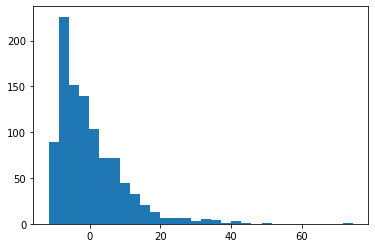

In [17]:
plt.hist(x - np.mean(x),30)

(array([ 89., 226., 151., 139., 103.,  72.,  72.,  44.,  33.,  21.,  13.,
          6.,   6.,   6.,   3.,   5.,   4.,   1.,   3.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.23952055, -0.93534994, -0.63117932, -0.32700871, -0.02283809,
         0.28133252,  0.58550314,  0.88967375,  1.19384437,  1.49801498,
         1.80218559,  2.10635621,  2.41052682,  2.71469744,  3.01886805,
         3.32303867,  3.62720928,  3.93137989,  4.23555051,  4.53972112,
         4.84389174,  5.14806235,  5.45223297,  5.75640358,  6.06057419,
         6.36474481,  6.66891542,  6.97308604,  7.27725665,  7.58142727,
         7.88559788]),
 <BarContainer object of 30 artists>)

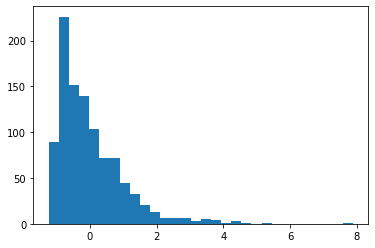

In [19]:
plt.hist((x - np.mean(x))/np.std(x),30)

Transformaciones por quantiles

In [20]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

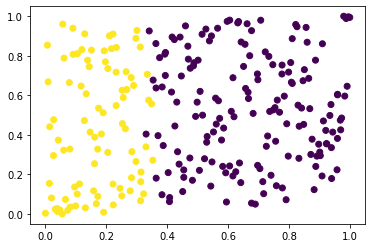

In [24]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y);
plt.savefig("./images/new_x_q.png")

In [32]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

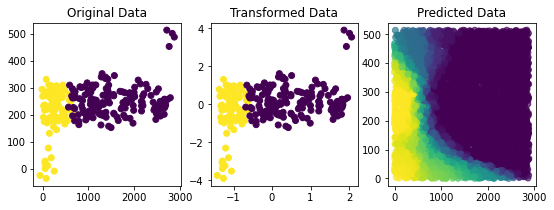

In [35]:
plot_output(scaler=StandardScaler())
plt.savefig("./images/std.png")

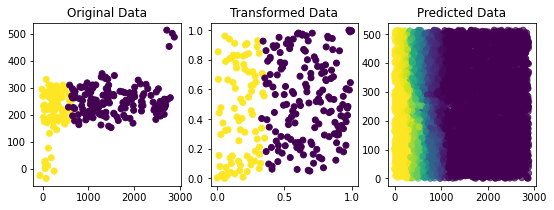

In [36]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))
plt.savefig("./images/quantiles.png")

# Nuevos datos

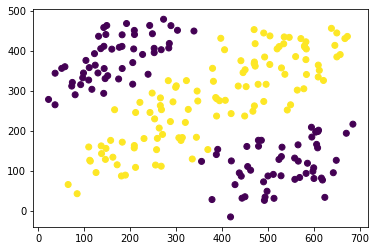

In [38]:
df = pd.read_csv("./data/drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);
plt.savefig("./images/df.png")

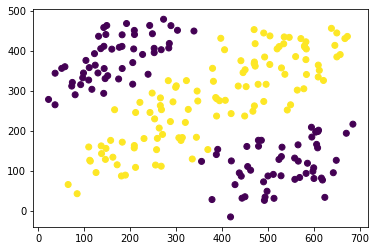

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);
plt.savefig("./images/pred.png")

# One Hot Encoding

In [41]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [42]:

from sklearn.preprocessing import OneHotEncoder

In [43]:

enc = OneHotEncoder(sparse=False, handle_unknown='ignore') #ignora los errores
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [44]:
enc.transform([["zero"]])

array([[0., 0., 0.]])